# General Bertalanffy

https://jmahaffy.sdsu.edu/courses/f15/math337/beamer/linear-04.pdf  
https://en.wikipedia.org/wiki/Ludwig_von_Bertalanffy  


[*********************100%***********************]  1 of 1 completed


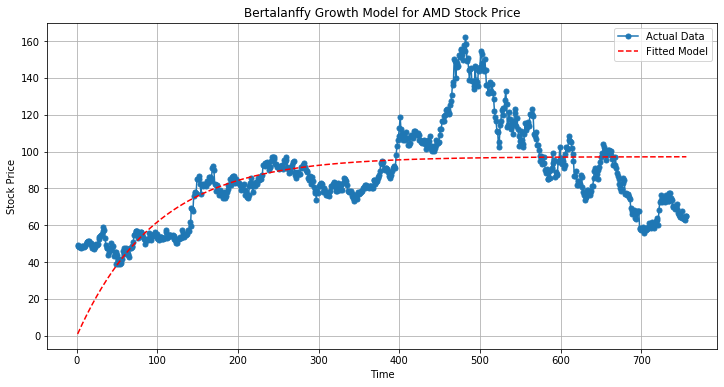

Fitted Parameters - a: 97.20231735205749, r: 0.010110069773265219, K: 65907107.75438881


In [1]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Input
symbol = 'AMD'
start = '2020-01-01'
end = '2023-01-01'

# Read data
dataset = yf.download(symbol, start, end)

# Prepare data
data = dataset['Adj Close'].values

# Define time points
t = np.arange(len(data))

# Define the time steps (assumption: daily data)
time = np.arange(1, len(data) + 1)

# Create a function for the Bertalanffy model
def bertalanffy_growth(t, a, r, K):
    return a * (1 - np.exp(-r * t)) / (1 + (a - 1) * np.exp(-r * t) / K)

# Define initial parameter guesses
a_guess = 100  # Proportional constant
r_guess = 0.01  # Growth rate
K_guess = 150  # Carrying capacity

# Fit the Bertalanffy model to the data using curve_fit from scipy.optimize
from scipy.optimize import curve_fit

# Fit the Bertalanffy model
params, covariance = curve_fit(bertalanffy_growth, time, data, p0=[a_guess, r_guess, K_guess])

# Unpack the fitted parameters
a, r, K = params

# Generate model predictions
predictions = bertalanffy_growth(time, a, r, K)

# Plot the data and the fitted model
plt.figure(figsize=(12, 6))
plt.plot(time, data, label='Actual Data', marker='o', linestyle='-', markersize=5)
plt.plot(time, predictions, label='Fitted Model', linestyle='--', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title(f'Bertalanffy Growth Model for {symbol} Stock Price')
plt.grid(True)
plt.show()

# Print the fitted parameters
print(f"Fitted Parameters - a: {a}, r: {r}, K: {K}")